In [3]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load v1 model + tfidf
lr = joblib.load("../models/Sentiment_Classifier_v1/lr_model.joblib")
tfidf = joblib.load("../models/Sentiment_Classifier_v1/tfidf_vectorizer.joblib")


In [4]:
df_test = pd.read_csv("../data/IMDB_Dataset_cleaned.csv")  

df_test.head()

,review,sentiment,review_length,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter matteis love time money visually stunni...


In [5]:

X_test = tfidf.transform(df_test['cleaned_review'])
y_test = df_test['sentiment'].map({'positive':1, 'negative':0})


              precision    recall  f1-score   support

           0       0.91      0.90      0.90     25000
           1       0.90      0.91      0.91     25000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000



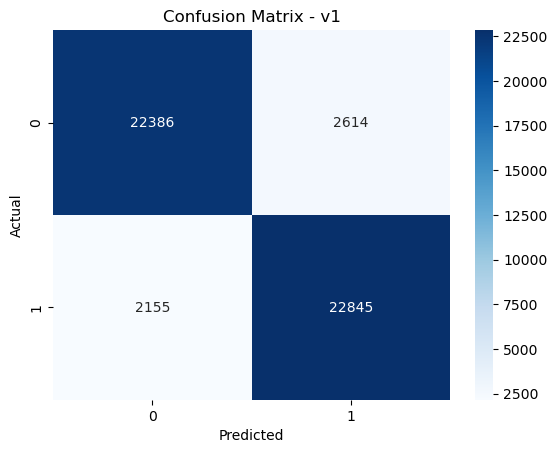

In [6]:
y_pred = lr.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - v1")
plt.show()
